# Data Science 
## AIMS Cameroon 
## Batch 2021

Name: VICTORIA OKESIPE

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## 1. Read the data from the following [address](https://raw.githubusercontent.com/rock-feller/Datasets_for_Education/main/data_01/winequality-white.csv).  (0.25pt)


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Datasets_for_Education/main/Business/wine_quality.txt", sep=";")
df               

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
df["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9])

## 2. From the description of the datasets [here](https://raw.githubusercontent.com/rock-feller/Datasets_for_Education/main/data_01/description_winedataset.txt),  what type of supervised learning task are we dealing with ? (0.25pt)

It is a multi-class classification problem. 

## 3. Provide a report table containing each class and the corresponding number of samples. (1pt)


In [ ]:
df_proportion = pd.DataFrame(df['quality'].value_counts(dropna=False)).reset_index()
df_proportion.columns = ['quality' , 'Samples']
df_proportion

,quality,Samples
0,6,2198
1,5,1457
2,7,880
3,8,175
4,4,163
5,3,20
6,9,5


## 4. What is the predominant class and report the percentage it accounts for? (1pt)

In [ ]:
df_proportion['percentage'] = round(df_proportion['Samples'] * 100/sum(df_proportion['Samples'])  , 1)
df_proportion

,quality,Samples,percentage
0,6,2198,44.9
1,5,1457,29.7
2,7,880,18.0
3,8,175,3.6
4,4,163,3.3
5,3,20,0.4
6,9,5,0.1


The predominant class is **0** and it accounts for **44.9%** of the observations.

## 5. Provide a correlation matrix and a correlation map between every feature variable. What are the two most positively correlated features? (1.5pts)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

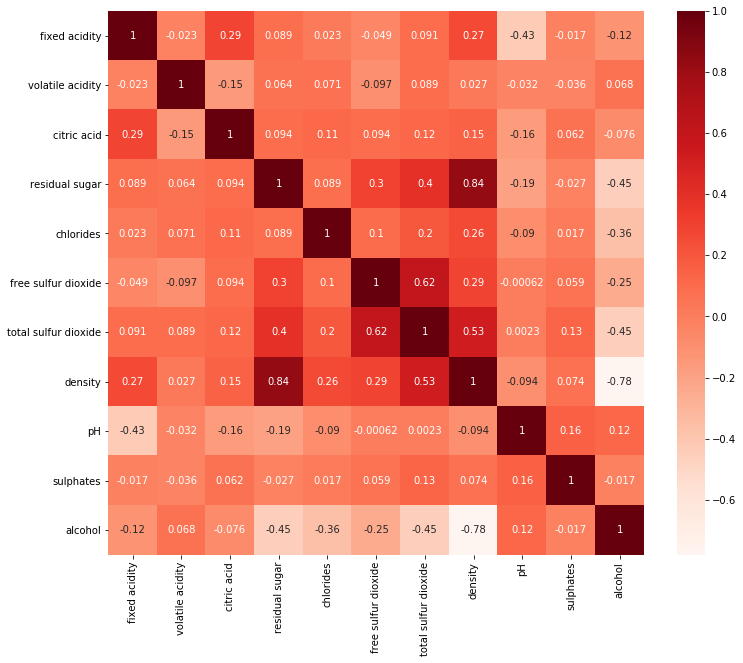

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.drop("quality", axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The two most correlated features are **density** and **residual sugar**

## 6. Use the mutual information criteria to select the 5 best features. List them. (1pt)

In [ ]:
from sklearn.feature_selection import SelectKBest , mutual_info_classif

In [ ]:
df_input = df.drop('quality',axis=1)
y_output = df['quality']

In [ ]:
selector = SelectKBest(mutual_info_classif, k=5)
selector.fit_transform(df_input, y_output)
df_input.columns[selector.get_support(indices=True)]

#To get the list
vector_names = list(df_input.columns[selector.get_support(indices=True)])
print('The 5 features are ' , vector_names)

The 5 features are  ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol']


## 7. Normalize one convenient column in such a way that values lie between 0 and 1 (1pt)

(You might want to use the MinMaxScaler)

In [ ]:
df_new = df[vector_names +[ 'quality']]
df_new 

,residual sugar,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
0,20.7,45.0,170.0,1.00100,8.8,6
1,1.6,14.0,132.0,0.99400,9.5,6
2,6.9,30.0,97.0,0.99510,10.1,6
3,8.5,47.0,186.0,0.99560,9.9,6
4,8.5,47.0,186.0,0.99560,9.9,6
...,...,...,...,...,...,...
4893,1.6,24.0,92.0,0.99114,11.2,6
4894,8.0,57.0,168.0,0.99490,9.6,5
4895,1.2,30.0,111.0,0.99254,9.4,6
4896,1.1,20.0,110.0,0.98869,12.8,7


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler  

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1)).fit(df_new['residual sugar'].values.reshape(-1,1))

In [ ]:
col1_scaled = scaler.transform(df_new['residual sugar'].values.reshape(-1,1))

In [ ]:
df_new['residual sugar'] = col1_scaled
df_new

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,residual sugar,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
0,0.308282,45.0,170.0,1.00100,8.8,6
1,0.015337,14.0,132.0,0.99400,9.5,6
2,0.096626,30.0,97.0,0.99510,10.1,6
3,0.121166,47.0,186.0,0.99560,9.9,6
4,0.121166,47.0,186.0,0.99560,9.9,6
...,...,...,...,...,...,...
4893,0.015337,24.0,92.0,0.99114,11.2,6
4894,0.113497,57.0,168.0,0.99490,9.6,5
4895,0.009202,30.0,111.0,0.99254,9.4,6
4896,0.007669,20.0,110.0,0.98869,12.8,7


## 8. Apply a train_test split on the data and Fit it the with Support Vector Classifer. (1pt)
Use 55% of the observations as your training set and use the default parameters.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_new.drop('quality',axis=1), df_new['quality'],
                                                    random_state=42, 
                                                    test_size =0.45)

In [ ]:
from sklearn.svm import SVC
sup_vec = SVC()
sup_vec.fit(X_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predict = sup_vec.predict(X_test)

## 9. Report the following evaluation metrics (1.5pts)

* The accuracy score
* The confusion matrix
* Precision and the recall score 

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score

In [ ]:
#The accuracy score
accuracy_score(y_test , y_predict)

0.45170068027210886

In [ ]:
# The confusion matrix
confusion_matrix(y_test , y_predict)

array([[  0,   0,   3,   5,   0,   0],
       [  0,   0,   2,  61,   0,   0],
       [  0,   0,  68, 575,   0,   0],
       [  0,   0,  68, 928,   0,   0],
       [  0,   0,  10, 406,   0,   0],
       [  0,   0,   2,  77,   0,   0]], dtype=int64)

# The Precision and recall score can't be computed because its a multinary classification problem

## 10. Use the GridSearch Method and a 10Fold Cross Validation to fine tune the "kernel"parameter.   (1.5pts)

* Which kernel function yield the best results?

* What is the interpretation of that result?

PS: Do not use the **pre-computed** instance. 

Hint: Check the documentation of the SVC

In [ ]:
from sklearn.model_selection import GridSearchCV , KFold

In [ ]:
cv = KFold(n_splits=10)
grid = dict()
grid [ 'kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']

In [ ]:
search = GridSearchCV(sup_vec, grid, scoring='accuracy', cv=10 , n_jobs=-1)
results = search.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
print('Config: %s' % results.best_params_)

In [ ]:
The poly function kernel is the best parameter. This means a polynomial hyperplane is the best separator for the 
different classes.

#THE END